# Instalación

In [1]:
!pip install pydataxm

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 8.2 MB/s eta 0:00:00
  Created wheel for pydataxm: filename=pydataxm-0.3.2-py3-none-any.whl size=3483 sha256=038f17c89e961f0aff23279f6028a8325e7114a6963f0044f94e73fa5ae4e5f1
  Stored in directory: /root/.cache/pip/wheels/21/a8/ff/7dbfb0451458bbbd9d4725ef38492c21adc0a978d3d104862b
Successfully built pydataxm


In [2]:
!pip install sodapy

In [3]:
!pip install holidays_co

# Import

In [4]:
# Importar los datos desd el github del proyecto
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/Astorress/especializacion-analitica-monografia/main/init.py
import init;

init.init(force_download=False);

replicating local resources


In [5]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pydataxm import *
from sodapy import Socrata

from holidays_co import *

from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [6]:
client = Socrata("www.datos.gov.co", None)

In [7]:
client.datasets

<bound method Socrata.datasets of <sodapy.socrata.Socrata object at 0x79938c147730>>

# Revisión APIs

## Revisión API XM

In [8]:
objetoAPI = pydataxm.ReadDB()                    #Se almacena el servicio en el nombre objetoAPI

In [9]:
df = objetoAPI.get_collections() #El método get_collection sin argumentos retorna todas las variables que se tienen disponible en la API y que se pueden consultar
df.head(200)

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
0,DemaReal,Demanda Real por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Demanda de usuarios regulados y no regulados q...
1,DemaReal,Demanda Real por Agente,Agente,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Comercializador,kWh,Demanda de usuarios regulados y no regulados q...
2,ExpoMoneda,Exportaciones Moneda por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,COP,Transferencias de Energia desde Colombia hacia...
3,DemaCome,Demanda Comercial por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comerciali...
4,Gene,Generación por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Generacion neta de cada una de las plantas Nac...
...,...,...,...,...,...,...,...,...,...
182,ListadoAgentes,Listado de agentes con atributos por Sistema,Sistema,731,ListsEntities,http://servapibi.xm.com.co/list,No aplica,,Listado de Agentes registrados ante el ASIC co...
183,ListadoRios,Listado de rios por Sistema,Sistema,731,ListsEntities,http://servapibi.xm.com.co/list,No aplica,,Listado de ríos que se encuentran registrados ...
184,ListadoEmbalses,Listado de embalses por Sistema,Sistema,731,ListsEntities,http://servapibi.xm.com.co/list,No aplica,,Listado de embalses que se encuentran registra...
185,ListadoMetricas,Listado de Métricas por Sistema,Sistema,731,ListsEntities,http://servapibi.xm.com.co/list,No aplica,,Listado de métricas disponibles en la API XM c...


In [10]:
df_metricas = objetoAPI.request_data(
                        'ListadoMetricas',           #Se indica el nombre de la métrica tal como se llama en el campo metricId
                        'Sistema',             #Se indica el nombre de la entidad tal como se llama en el campo Entity
                        dt.date(2017, 1, 1),  #Corresponde a la fecha inicial de la consulta
                        dt.date(2022, 1, 15)) #Corresponde a la fecha final de la consulta

df_metricas

,Id,Values_MetricId,Values_MetricName,Values_Entity,Values_MaxDays,Values_Type,Values_Url,Values_Filter,Values_MetricUnits,Values_MetricDescription,Date
0,Sistema,DemaReal,Demanda Real por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Demanda de usuarios regulados y no regulados q...,2023-10-11
1,Sistema,DemaReal,Demanda Real por Agente,Agente,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Comercializador,kWh,Demanda de usuarios regulados y no regulados q...,2023-10-11
2,Sistema,ExpoMoneda,Exportaciones Moneda por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,COP,Transferencias de Energia desde Colombia hacia...,2023-10-11
3,Sistema,DemaCome,Demanda Comercial por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comerciali...,2023-10-11
4,Sistema,Gene,Generación por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Generacion neta de cada una de las plantas Nac...,2023-10-11
...,...,...,...,...,...,...,...,...,...,...,...
182,Sistema,ListadoAgentes,Listado de agentes con atributos por Sistema,Sistema,731,ListsEntities,http://servapibi.xm.com.co/list,No aplica,,Listado de Agentes registrados ante el ASIC co...,2023-10-11
183,Sistema,ListadoRios,Listado de rios por Sistema,Sistema,731,ListsEntities,http://servapibi.xm.com.co/list,No aplica,,Listado de ríos que se encuentran registrados ...,2023-10-11
184,Sistema,ListadoEmbalses,Listado de embalses por Sistema,Sistema,731,ListsEntities,http://servapibi.xm.com.co/list,No aplica,,Listado de embalses que se encuentran registra...,2023-10-11
185,Sistema,ListadoMetricas,Listado de Métricas por Sistema,Sistema,731,ListsEntities,http://servapibi.xm.com.co/list,No aplica,,Listado de métricas disponibles en la API XM c...,2023-10-11


In [11]:
df_recursos_sistema = objetoAPI.request_data(
                        'ListadoRecursos',           #Se indica el nombre de la métrica tal como se llama en el campo metricId
                        'Sistema',             #Se indica el nombre de la entidad tal como se llama en el campo Entity
                        dt.date(2017, 1, 1),  #Corresponde a la fecha inicial de la consulta
                        dt.date(2022, 1, 15)) #Corresponde a la fecha final de la consulta

df_recursos_sistema

,Id,Values_Code,Values_Name,Values_Type,Values_Disp,Values_RecType,Values_CompanyCode,Values_EnerSource,Values_OperStartdate,Values_State,Date
0,Sistema,2QBW,EL POPAL,HIDRAULICA,NO DESPACHADO CENTRALMENTE,FILO DE AGUA,ISGG,AGUA,2014-03-31,OPERACION,2023-10-11
1,Sistema,2QEK,SALTO II,HIDRAULICA,DESPACHADO CENTRALMENTE,FILO DE AGUA,ENDG,AGUA,2014-06-25,OPERACION,2023-10-11
2,Sistema,2QRL,LA REBUSCA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,GEN. DISTRIBUIDA,HZEG,AGUA,2014-07-24,OPERACION,2023-10-11
3,Sistema,2QV2,BAJO TULUA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,EPSG,AGUA,2015-01-30,OPERACION,2023-10-11
4,Sistema,2R22,LAGUNETA,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,ENDG,AGUA,2014-12-17,OPERACION,2023-10-11
...,...,...,...,...,...,...,...,...,...,...,...
555,Sistema,VNTB,VENTANA B,HIDRAULICA,NO DESPACHADO CENTRALMENTE,NORMAL,HDTG,AGUA,1957-11-01,OPERACION,2023-10-11
556,Sistema,ZPA2,ZIPAEMG 2,TERMICA,DESPACHADO CENTRALMENTE,NORMAL,ENDG,CARBON,1964-01-01,OPERACION,2023-10-11
557,Sistema,ZPA3,ZIPAEMG 3,TERMICA,DESPACHADO CENTRALMENTE,NORMAL,ENDG,CARBON,1976-01-01,OPERACION,2023-10-11
558,Sistema,ZPA4,ZIPAEMG 4,TERMICA,DESPACHADO CENTRALMENTE,NORMAL,ENDG,CARBON,1981-04-01,OPERACION,2023-10-11


In [12]:
df_recursos_agente = objetoAPI.request_data(
                        'ListadoRecursos',           #Se indica el nombre de la métrica tal como se llama en el campo metricId
                        'Agente',             #Se indica el nombre de la entidad tal como se llama en el campo Entity
                        dt.date(2017, 1, 1),  #Corresponde a la fecha inicial de la consulta
                        dt.date(2022, 1, 15)) #Corresponde a la fecha final de la consulta

df_recursos_agente

,Id,Values_code1,Values_code2,Values_Value,Date
0,Agente,AAGG,3C3Z,LA SIERPE 1,2023-10-11
1,Agente,AAGG,3HBN,TIERRA LINDA 1,2023-10-11
2,Agente,AAGG,3HBP,LA TOLUA 1,2023-10-11
3,Agente,ABAG,2UX3,AURES BAJO 1,2023-10-11
4,Agente,ABAG,2UX3,AURES BAJO 2,2023-10-11
...,...,...,...,...,...
395,Agente,TYPG,TYP1,TERMOYOPAL 1,2023-10-11
396,Agente,TYPG,TYP2,TERMOYOPAL 2,2023-10-11
397,Agente,TYPG,TYP3,TERMOYOPAL G3,2023-10-11
398,Agente,TYPG,TYP4,TERMOYOPAL G4,2023-10-11


In [13]:
df_agentes = objetoAPI.request_data(
                        'ListadoAgentes',           #Se indica el nombre de la métrica tal como se llama en el campo metricId
                        'Sistema',             #Se indica el nombre de la entidad tal como se llama en el campo Entity
                        dt.date(2017, 1, 1),  #Corresponde a la fecha inicial de la consulta
                        dt.date(2022, 1, 15)) #Corresponde a la fecha final de la consulta

df_agentes

,Id,Values_Code,Values_Name,Values_Activity,Values_OperStartdate,Values_State,Date
0,Sistema,TCNG,GENERADORA TERMOCENTRO S.A.S. E.S.P.,GENERACIÓN,2023-10-02,OPERACION,2023-10-11
1,Sistema,CMCD,COMPAÑÍA ELÉCTRICA DEL MAR CARIBE S.A.S. E.S.P,DISTRIBUCIÓN,2023-09-21,OPERACION,2023-10-11
2,Sistema,PDSG,PARQUE SOLAR PORTON DEL SOL SAS ESP,GENERACIÓN,2023-09-13,OPERACION,2023-10-11
3,Sistema,VNRG,VIENTOS DEL NORTE S.A.S. E.S.P.,GENERACIÓN,2023-09-11,OPERACION,2023-10-11
4,Sistema,EYCG,ENERGIA Y GAS DE COLOMBIA SAS ESP,GENERACIÓN,2023-08-29,OPERACION,2023-10-11
...,...,...,...,...,...,...,...
592,Sistema,EECC,EMPRESA DE ENERGIA DE CUNDINAMARCA S.A. E.S.P.,COMERCIALIZACIÓN,1995-07-20,INACTIVO,2023-10-11
593,Sistema,EECD,EMPRESA DE ENERGIA DE CUNDINAMARCA S.A. E.S.P.,DISTRIBUCIÓN,1995-07-20,INACTIVO,2023-10-11
594,Sistema,EECG,EMPRESA DE ENERGIA DE CUNDINAMARCA S.A. E.S.P.,GENERACIÓN,1995-07-20,INACTIVO,2023-10-11
595,Sistema,EPMT,EMPRESAS PUBLICAS DE MEDELLIN E.S.P.,TRANSPORTE,1995-01-01,OPERACION,2023-10-11


In [14]:
df_agentes[(df_agentes['Values_Name'].str.contains('medellin', case=False) == True)].reset_index(drop=True) # regex

,Id,Values_Code,Values_Name,Values_Activity,Values_OperStartdate,Values_State,Date
0,Sistema,EPMG,EMPRESAS PUBLICAS DE MEDELLIN E.S.P.,GENERACIÓN,1995-07-20,OPERACION,2023-10-11
1,Sistema,EPMC,EMPRESAS PUBLICAS DE MEDELLIN E.S.P.,COMERCIALIZACIÓN,1995-07-20,OPERACION,2023-10-11
2,Sistema,EPMD,EMPRESAS PUBLICAS DE MEDELLIN E.S.P.,DISTRIBUCIÓN,1995-07-20,OPERACION,2023-10-11
3,Sistema,EPMT,EMPRESAS PUBLICAS DE MEDELLIN E.S.P.,TRANSPORTE,1995-01-01,OPERACION,2023-10-11


In [15]:
df_consumo = objetoAPI.request_data(
                        'DemaCome',           #Se indica el nombre de la métrica tal como se llama en el campo metricId
                        'Agente',             #Se indica el nombre de la entidad tal como se llama en el campo Entity
                        dt.date(2015, 1, 1),  #Corresponde a la fecha inicial de la consulta
                        dt.date(2023, 9, 18), #Corresponde a la fecha final de la consulta
                        filtros =['EPMC'])

df_consumo

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,Values_Hour10,Values_Hour11,Values_Hour12,Values_Hour13,Values_Hour14,Values_Hour15,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Agente,EPMC,874902.37,811130.06,768748.60,744469.99,735272.46,712525.25,667477.72,686707.73,737933.92,786308.49,827395.32,855794.93,877006.72,868503.94,851601.10,834533.09,823721.46,867149.24,1026889.39,1036455.53,997156.93,939934.82,846098.10,737264.97,2015-01-01
1,Agente,EPMC,699781.13,709869.54,696670.76,712739.63,740903.07,791631.78,860626.11,939408.13,1061308.01,1127002.31,1187117.16,1227815.51,1232292.98,1213253.86,1201789.34,1191749.17,1173905.93,1183620.44,1327918.78,1321697.98,1237953.79,1130694.38,1027821.94,929550.82,2015-01-02
2,Agente,EPMC,845367.77,806900.27,777052.40,788981.90,814260.98,853214.06,871143.45,964227.95,1042132.24,1110830.49,1174422.99,1213302.27,1208834.31,1183296.60,1150294.73,1135067.94,1116776.71,1123644.76,1292156.21,1287647.37,1231779.11,1108847.83,1001956.93,973063.72,2015-01-03
3,Agente,EPMC,848403.10,804607.94,774110.78,766400.24,775140.36,773875.85,784375.81,847269.15,917765.04,972199.44,1038504.36,1078997.28,1082296.61,1072594.58,1042906.41,1019592.40,1013269.76,1023151.23,1182284.86,1198453.84,1155918.51,1060257.60,962598.22,830725.98,2015-01-04
4,Agente,EPMC,811468.23,795797.35,753654.14,781283.55,835500.01,914560.51,990633.03,1098402.96,1188727.71,1252057.66,1312454.83,1358315.56,1349637.98,1336665.71,1341175.33,1332419.13,1302718.14,1298798.02,1403991.19,1396780.60,1303091.56,1192559.28,1060380.63,988940.56,2015-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,Agente,EPMC,1229609.81,1185567.00,1145843.72,1145167.20,1202865.81,1311552.57,1398684.37,1482071.27,1534859.39,1593592.72,1676969.16,1733005.60,1725986.03,1704884.02,1700037.53,1712904.78,1701658.03,1640700.94,1702078.68,1715946.92,1636027.36,1522228.84,1391455.95,1290731.83,2023-09-14
3179,Agente,EPMC,1199396.09,1167002.89,1138902.15,1127704.60,1186844.03,1286513.58,1384434.56,1469306.31,1550405.93,1597476.42,1688737.38,1741051.36,1725203.17,1706734.75,1708119.82,1695913.68,1664985.03,1607196.53,1683850.78,1671014.58,1596169.60,1498153.92,1396988.50,1292183.28,2023-09-15
3180,Agente,EPMC,1214220.79,1172907.93,1140582.42,1124019.53,1160749.69,1209300.27,1277262.82,1378301.85,1474892.26,1536095.41,1613591.11,1650813.87,1621877.89,1570677.09,1541881.58,1540925.93,1520109.20,1495315.71,1578739.43,1561351.00,1481850.54,1390996.57,1302452.12,1215020.07,2023-09-16
3181,Agente,EPMC,1149436.04,1098979.94,1053502.06,1016313.77,1004827.42,1022658.56,1001264.55,1055271.04,1134239.53,1191715.69,1250532.21,1289739.42,1324118.26,1312500.27,1283377.49,1253760.16,1251190.52,1245886.46,1368680.90,1397082.00,1354029.63,1298861.37,1223416.92,1166799.61,2023-09-17


In [16]:
df_consumo.to_csv('/content/drive/MyDrive/Colab Notebooks/especializacion/Monografia/data/demanda_comercial.csv')

## Revisión API Socrata

In [17]:
client = Socrata("www.datos.gov.co", None) #conexion

df_temperatura = pd.DataFrame(columns = ['codigoestacion', 'fechaobservacion', 'valorobservado', 'municipio'])
date_start = dt.datetime(2015, 1, 1)

while date_start < dt.datetime.now():

  date_end = date_start + dt.timedelta(days=160)

  date_start_string = date_start.strftime('%Y-%m-%d')
  date_end_string = date_end.strftime('%Y-%m-%d')

  df_temperatura_aux = client.get("sbwg-7ju4", limit = 10000000, departamento = 'ANTIOQUIA', where = f"fechaobservacion between '{date_start_string}' and '{date_end_string}'",
                              select = 'codigoestacion, fechaobservacion, valorobservado, municipio')
  df_temperatura_aux = pd.DataFrame.from_records(df_temperatura_aux)

  df_temperatura = pd.concat([df_temperatura, df_temperatura_aux], ignore_index = True)

  date_start = date_end - dt.timedelta(days=1)


In [18]:
# Procesamiento de las columnas del dataset
df_temperatura = df_temperatura.drop_duplicates().reset_index(drop = True)

df_temperatura['fechaobservacion'] = pd.to_datetime(df_temperatura['fechaobservacion'])
df_temperatura['fecha'] = df_temperatura['fechaobservacion'].dt.strftime('%Y-%m-%d %H:00:00')
df_temperatura['fecha'] = pd.to_datetime(df_temperatura['fecha'])

# Agrupación de los datos de temperatura por promedio diario filtrando por municipio valle de aburra y san nicolas
df_temperatura['valorobservado'] = df_temperatura['valorobservado'].map(float)
df_temperatura = df_temperatura[df_temperatura['municipio'].isin(['MEDELLÍN', 'RIONEGRO', 'BELLO', 'SANTUARIO'])].reset_index(drop = True)

df_temperatura_median = df_temperatura.groupby(['fecha', 'municipio']).agg({'valorobservado': 'median'}).groupby(['fecha']).agg({'valorobservado': 'median'}).rename(columns = {'valorobservado': 'temperatura_mediana'}).reset_index()
df_temperatura_mean = df_temperatura.groupby(['fecha', 'municipio']).agg({'valorobservado': 'mean'}).groupby(['fecha']).agg({'valorobservado': 'mean'}).rename(columns = {'valorobservado': 'temperatura_prom'}).reset_index()
df_temperatura_max = df_temperatura.groupby(['fecha', 'municipio']).agg({'valorobservado': 'max'}).groupby(['fecha']).agg({'valorobservado': 'max'}).rename(columns = {'valorobservado': 'temperatura_max'}).reset_index()


In [19]:
df_temperatura_median['fecha_hora_str'] = df_temperatura_median['fecha'].dt.strftime('%Y-%m-%d %H:00:00')
df_temperatura_mean['fecha_hora_str'] = df_temperatura_mean['fecha'].dt.strftime('%Y-%m-%d %H:00:00')
df_temperatura_max['fecha_hora_str'] = df_temperatura_max['fecha'].dt.strftime('%Y-%m-%d %H:00:00')

df_temperatura = df_temperatura_median.merge(df_temperatura_mean[['fecha_hora_str', 'temperatura_prom']], how='left', on='fecha_hora_str').reset_index(drop=True)
df_temperatura = df_temperatura.merge(df_temperatura_max[['fecha_hora_str', 'temperatura_max']], how='left', on='fecha_hora_str').reset_index(drop=True)

df_temperatura = df_temperatura.drop(['fecha_hora_str'], axis = 1)
df_temperatura = df_temperatura.sort_values(by = 'fecha', ascending = True)
df_temperatura = df_temperatura.reset_index(drop=True)

In [20]:
df_temperatura

,fecha,temperatura_mediana,temperatura_prom,temperatura_max
0,2015-01-01 00:00:00,20.800,19.250000,21.3
1,2015-01-01 01:00:00,20.700,18.900000,20.8
2,2015-01-01 02:00:00,20.400,18.683333,20.5
3,2015-01-01 03:00:00,20.200,18.566667,20.4
4,2015-01-01 04:00:00,19.700,18.216667,19.9
...,...,...,...,...
74186,2023-10-10 19:00:00,20.150,20.148333,23.2
74187,2023-10-10 20:00:00,19.350,19.431667,22.9
74188,2023-10-10 21:00:00,19.150,19.160476,21.8
74189,2023-10-10 22:00:00,19.125,19.103889,21.7


In [21]:
df_temperatura.to_csv('/content/drive/MyDrive/Colab Notebooks/especializacion/Monografia/data/temperaturas.csv', index = False)

# Limpieza y creación de la base de datos

## Temperatura

In [22]:
df_temperatura['fecha'] = pd.to_datetime(df_temperatura['fecha'])

df_temperatura = df_temperatura.rename(columns={'fecha': 'fecha_hora','valorobservado': 'temperatura'})

In [23]:
df_temperatura # tem prom, tem mediana, tem max

,fecha_hora,temperatura_mediana,temperatura_prom,temperatura_max
0,2015-01-01 00:00:00,20.800,19.250000,21.3
1,2015-01-01 01:00:00,20.700,18.900000,20.8
2,2015-01-01 02:00:00,20.400,18.683333,20.5
3,2015-01-01 03:00:00,20.200,18.566667,20.4
4,2015-01-01 04:00:00,19.700,18.216667,19.9
...,...,...,...,...
74186,2023-10-10 19:00:00,20.150,20.148333,23.2
74187,2023-10-10 20:00:00,19.350,19.431667,22.9
74188,2023-10-10 21:00:00,19.150,19.160476,21.8
74189,2023-10-10 22:00:00,19.125,19.103889,21.7


### Exploración

In [24]:
# Número de registros y caracteristicas
df_temperatura.shape

(74191, 4)

In [25]:
# Información general del DataFrame
df_temperatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74191 entries, 0 to 74190
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fecha_hora           74191 non-null  datetime64[ns]
 1   temperatura_mediana  74191 non-null  float64       
 2   temperatura_prom     74191 non-null  float64       
 3   temperatura_max      74191 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.3 MB


In [26]:
# Se verifica si existen registros duplicados en todo el dataset
df_temperatura.duplicated().sum()

0

In [27]:
# Se muestran las estadisticas basicas del dataset
df_temperatura.describe()

,temperatura_mediana,temperatura_prom,temperatura_max
count,74191.000000,74191.000000,74191.000000
mean,19.676537,19.516770,22.123090
std,3.632598,3.488732,3.620607
min,1.000000,1.000000,1.000000
25%,16.900000,16.816667,19.400000
50%,19.000000,18.700000,21.300000
75%,22.300000,22.100000,24.700000
max,32.600000,32.600000,48.900000


### Datos nulos

In [28]:
# Se crea un dataframe donde se muestra el porcentaje de datos nulos ordenados de mayor a menor por las variables que mas tienen
df_null = pd.DataFrame()
df_null['caracteristica'] = dict(df_temperatura.isnull().sum()).keys()
df_null['% datos nulos'] = dict(df_temperatura.isnull().sum()).values()
df_null['% datos nulos'] = 100*(df_null['% datos nulos']/int(df_null.shape[0]))

df_null = df_null.sort_values(by = '% datos nulos', ascending = False).reset_index(drop = True)

df_null.head(5)

,caracteristica,% datos nulos
0,fecha_hora,0.0
1,temperatura_mediana,0.0
2,temperatura_prom,0.0
3,temperatura_max,0.0


### Datos atipicos

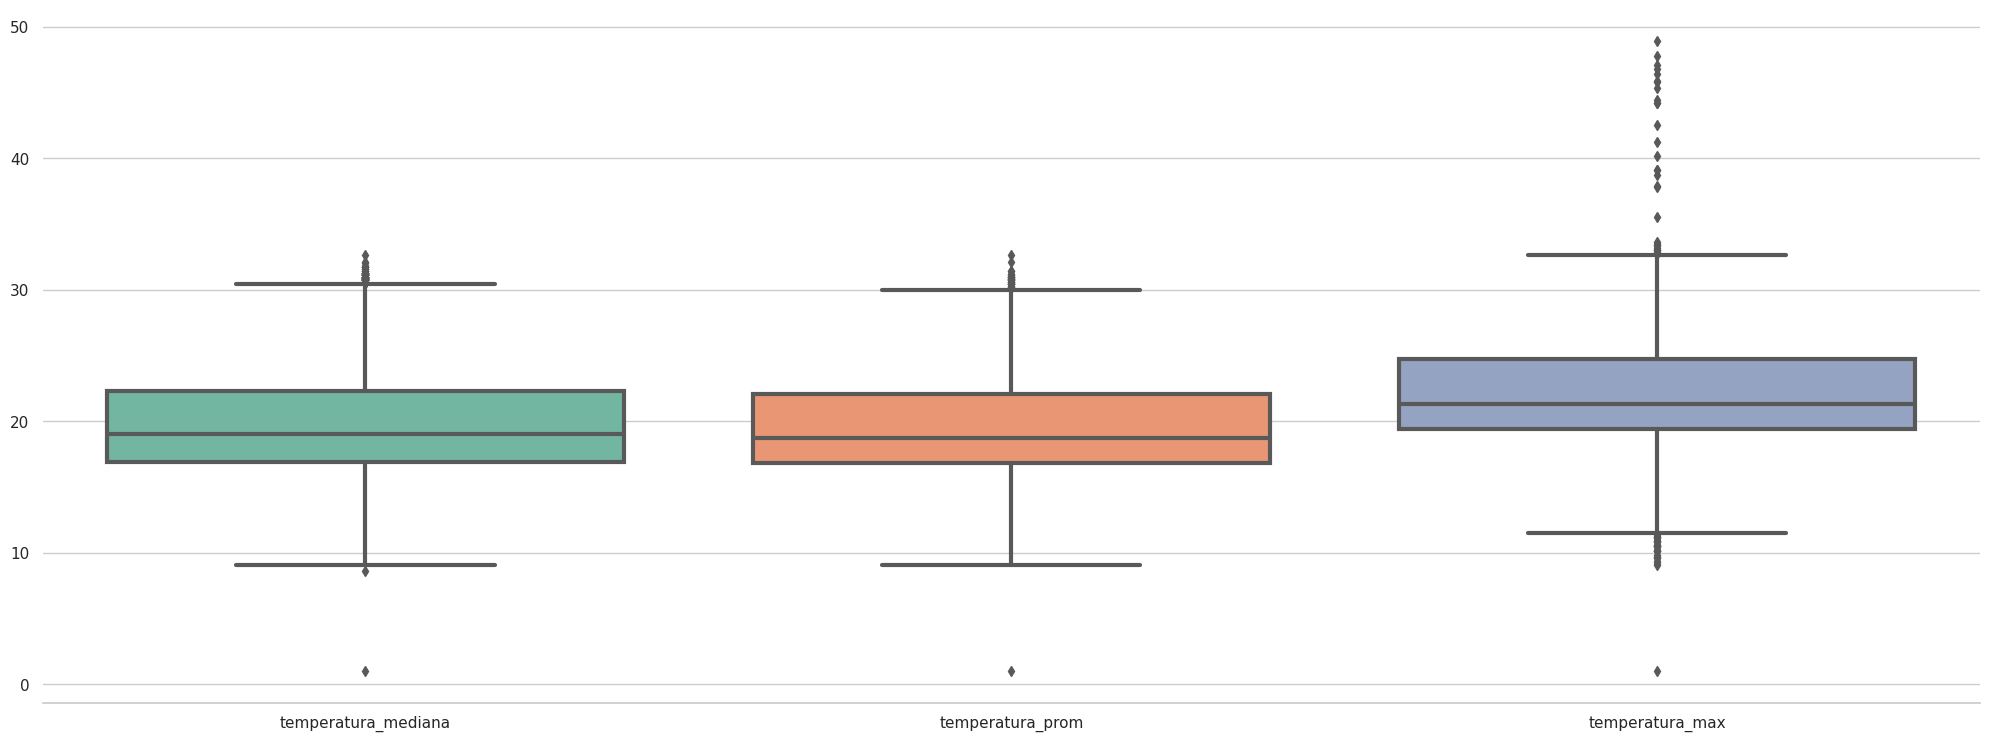

In [29]:
sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.boxplot(data = df_temperatura, linewidth = 3,
            palette="Set2", fliersize = 5)
sns.despine(left=True)

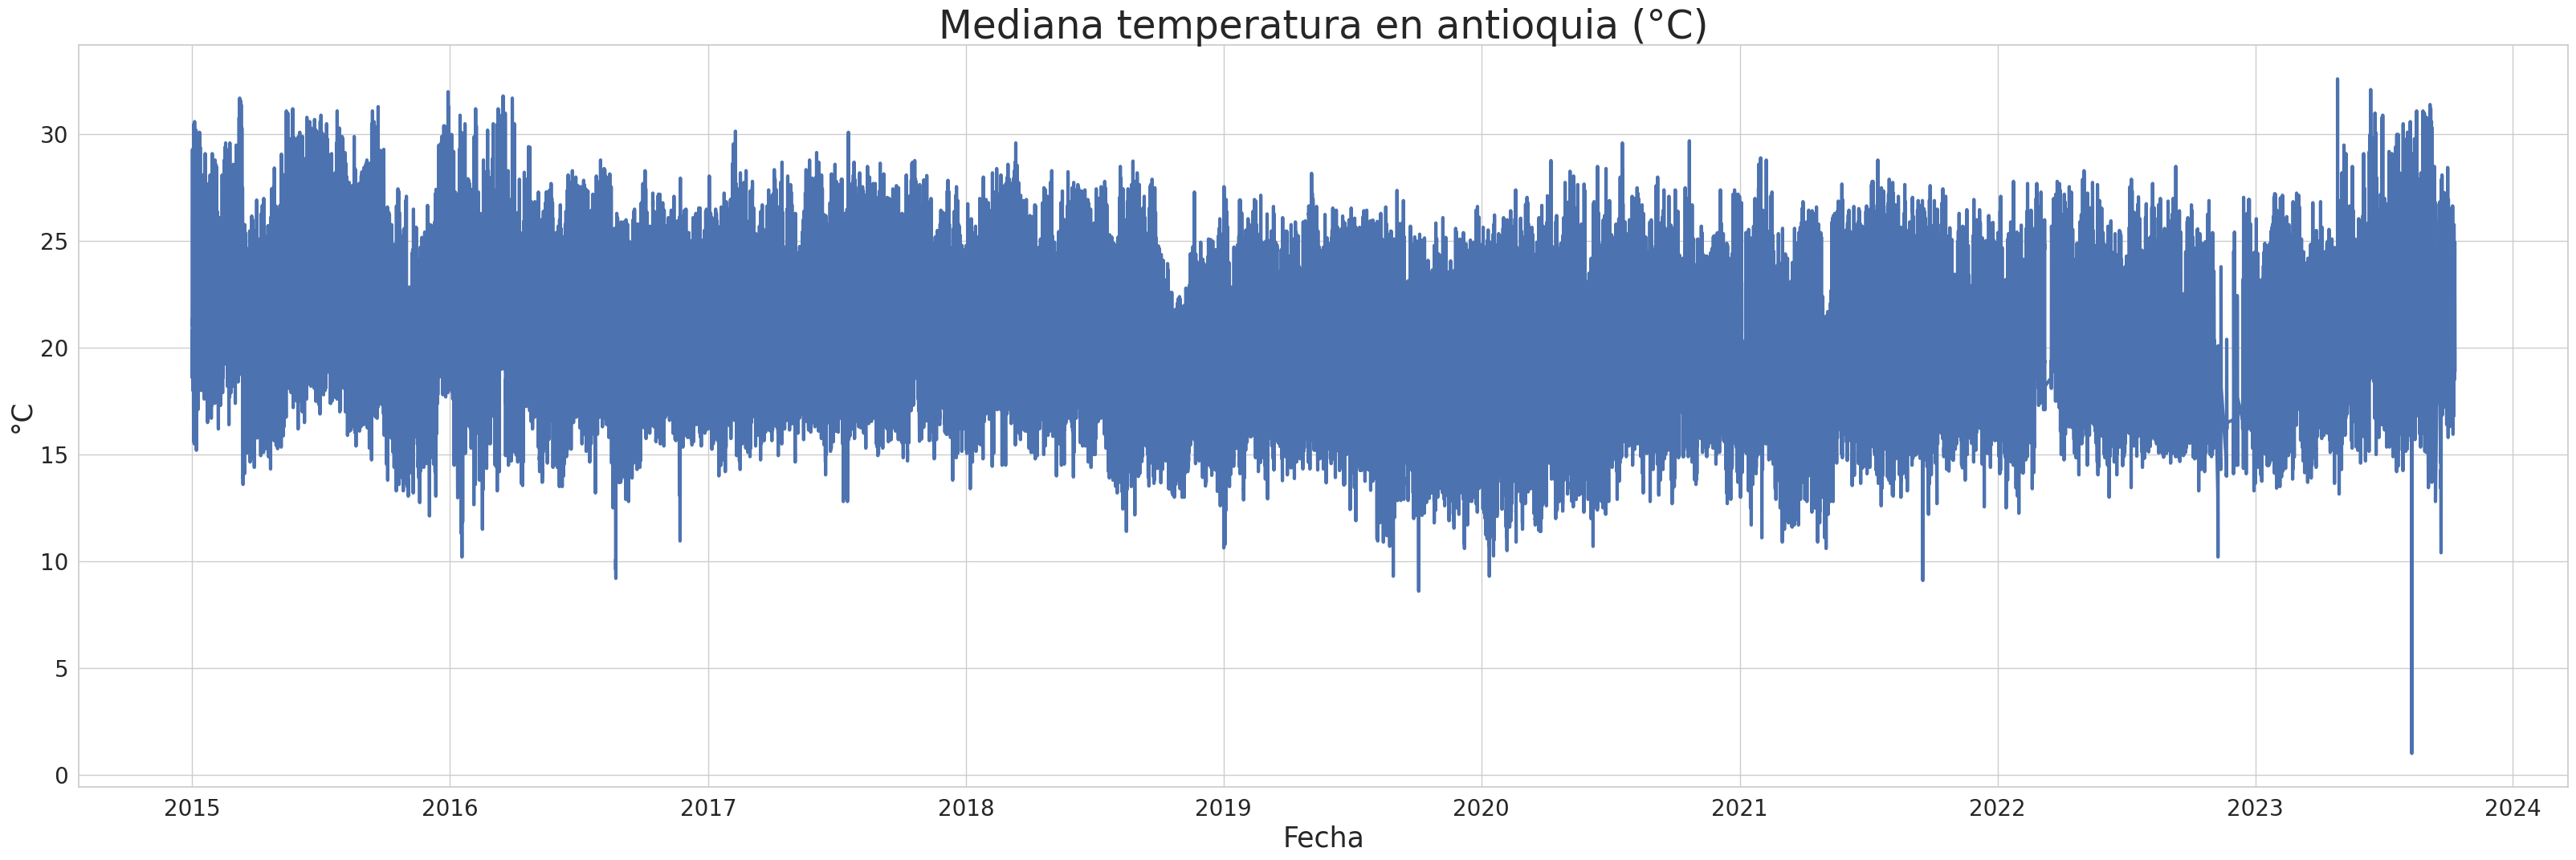

In [30]:
plt.figure(figsize=(40,12))
plt.plot(df_temperatura['fecha_hora'], df_temperatura['temperatura_mediana'], linewidth=3)
plt.title('Mediana temperatura en antioquia (°C)', fontsize = 35)
plt.xlabel('Fecha', fontsize = 25)
plt.xticks(fontsize = 20)
plt.ylabel('°C', fontsize = 25)
plt.yticks(fontsize = 20)
plt.show() # validar si se dejas desde el 2015

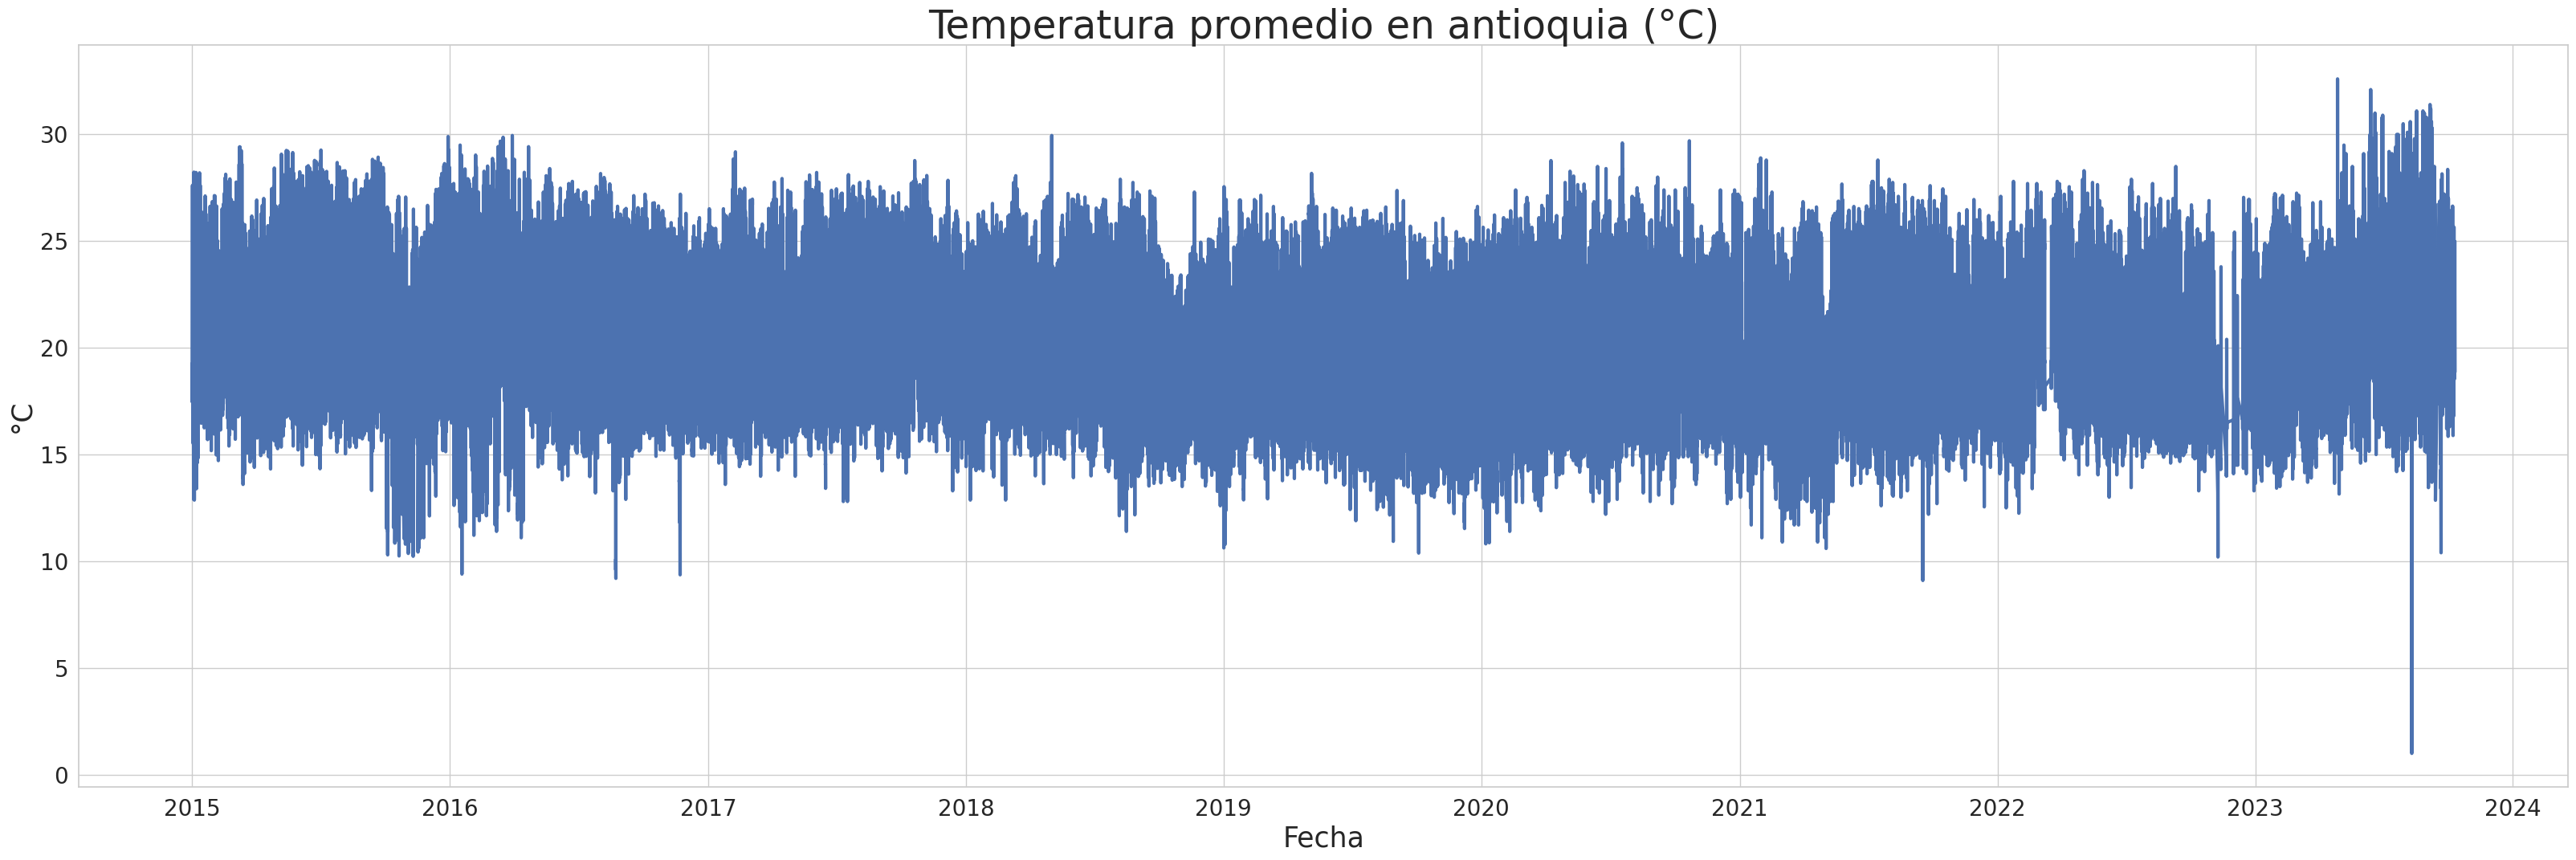

In [31]:
plt.figure(figsize=(40,12))
plt.plot(df_temperatura['fecha_hora'], df_temperatura['temperatura_prom'], linewidth=3)
plt.title('Temperatura promedio en antioquia (°C)', fontsize = 35)
plt.xlabel('Fecha', fontsize = 25)
plt.xticks(fontsize = 20)
plt.ylabel('°C', fontsize = 25)
plt.yticks(fontsize = 20)
plt.show() # validar si se dejas desde el 2015

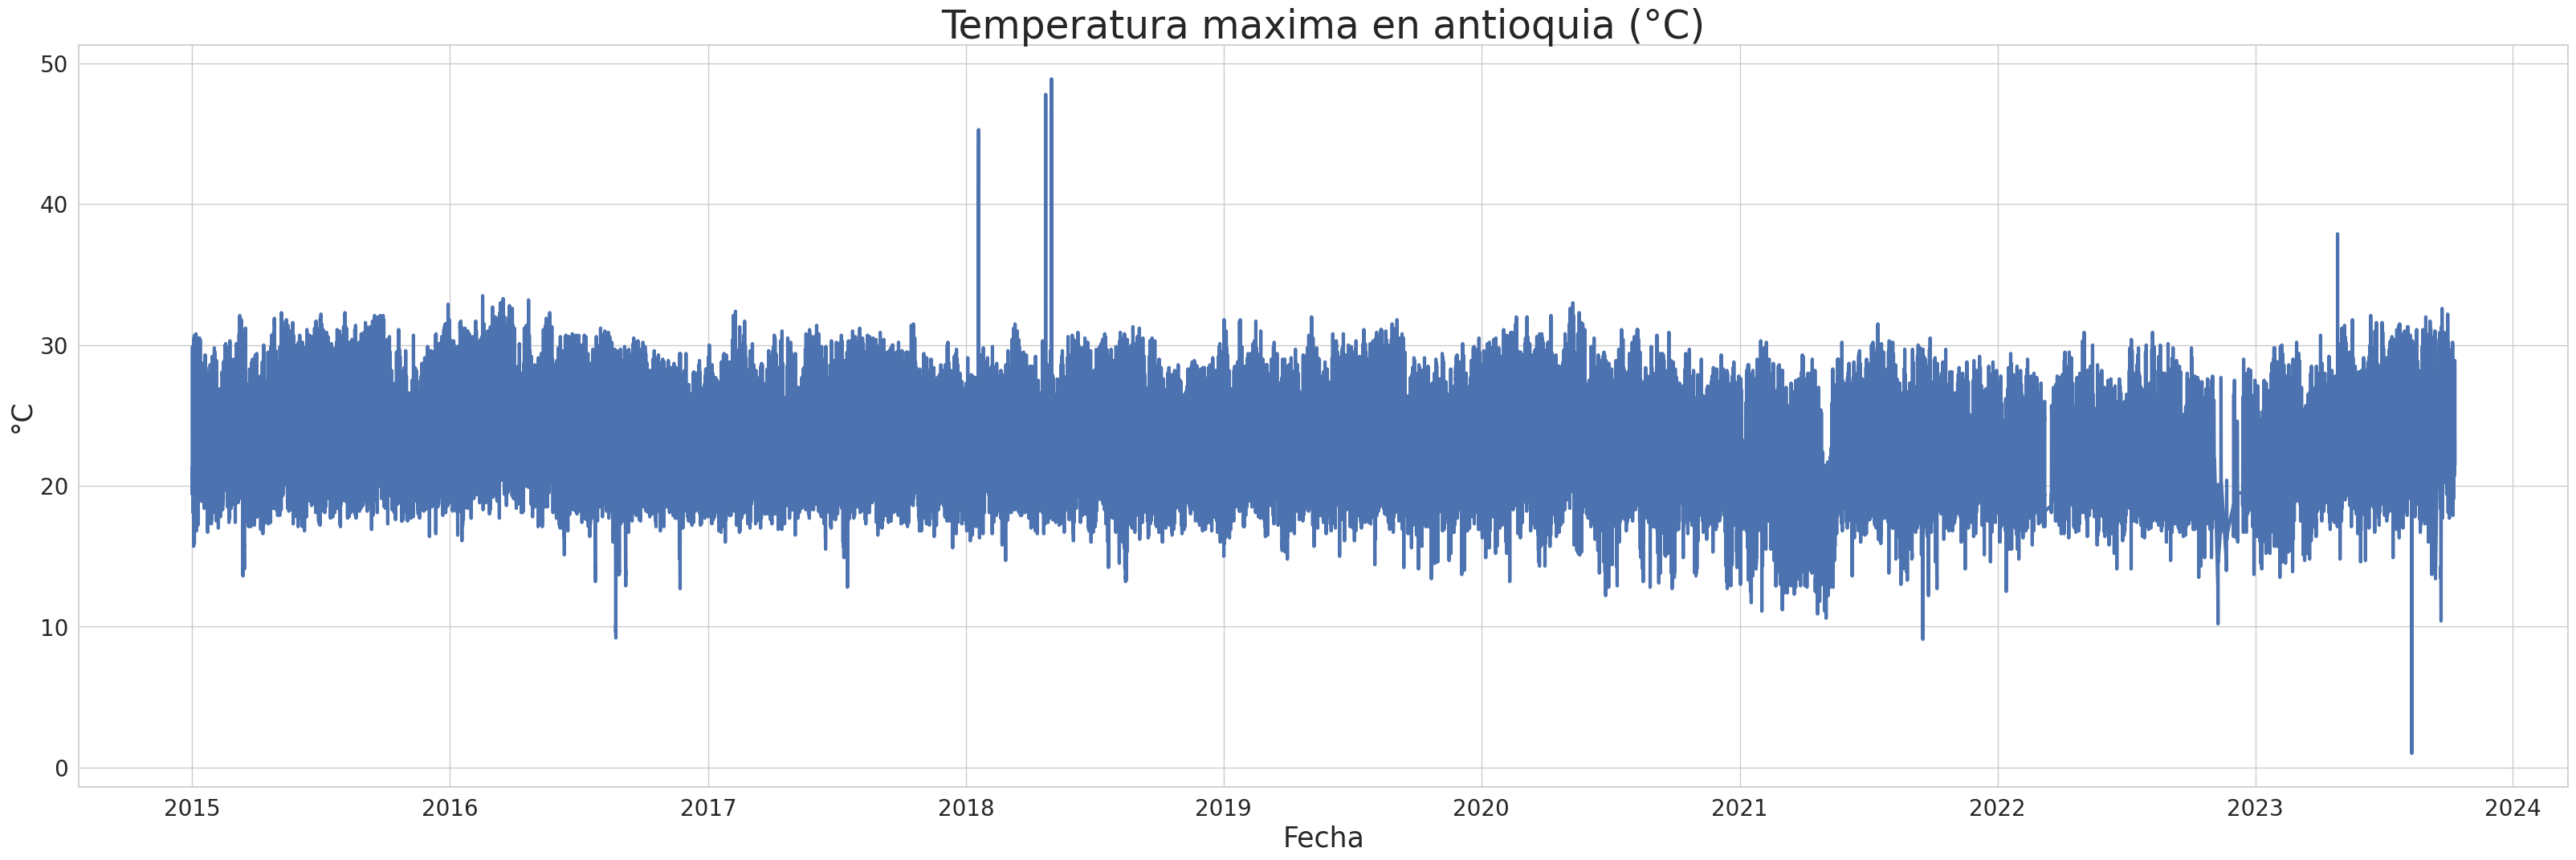

In [32]:
plt.figure(figsize=(40,12))
plt.plot(df_temperatura['fecha_hora'], df_temperatura['temperatura_max'], linewidth=3)
plt.title('Temperatura maxima en antioquia (°C)', fontsize = 35)
plt.xlabel('Fecha', fontsize = 25)
plt.xticks(fontsize = 20)
plt.ylabel('°C', fontsize = 25)
plt.yticks(fontsize = 20)
plt.show() # validar si se dejas desde el 2015

## Consumo

In [33]:
df_consumo.columns

Index(['Id', 'Values_code', 'Values_Hour01', 'Values_Hour02', 'Values_Hour03',
       'Values_Hour04', 'Values_Hour05', 'Values_Hour06', 'Values_Hour07',
       'Values_Hour08', 'Values_Hour09', 'Values_Hour10', 'Values_Hour11',
       'Values_Hour12', 'Values_Hour13', 'Values_Hour14', 'Values_Hour15',
       'Values_Hour16', 'Values_Hour17', 'Values_Hour18', 'Values_Hour19',
       'Values_Hour20', 'Values_Hour21', 'Values_Hour22', 'Values_Hour23',
       'Values_Hour24', 'Date'],
      dtype='object')

In [34]:
df_consumo = pd.melt(df_consumo, id_vars = 'Date', value_vars = ['Values_Hour01', 'Values_Hour02', 'Values_Hour03',
       'Values_Hour04', 'Values_Hour05', 'Values_Hour06', 'Values_Hour07',
       'Values_Hour08', 'Values_Hour09', 'Values_Hour10', 'Values_Hour11',
       'Values_Hour12', 'Values_Hour13', 'Values_Hour14', 'Values_Hour15',
       'Values_Hour16', 'Values_Hour17', 'Values_Hour18', 'Values_Hour19',
       'Values_Hour20', 'Values_Hour21', 'Values_Hour22', 'Values_Hour23',
       'Values_Hour24'])

df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour01', 0, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour02', 1, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour03', 2, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour04', 3, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour05', 4, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour06', 5, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour07', 6, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour08', 7, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour09', 8, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour10', 9, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour11', 10, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour12', 11, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour13', 12, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour14', 13, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour15', 14, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour16', 15, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour17', 16, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour18', 17, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour19', 18, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour20', 19, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour21', 20, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour22', 21, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour23', 22, df_consumo['variable'])
df_consumo['variable'] = np.where(df_consumo['variable'] == 'Values_Hour24', 23, df_consumo['variable'])

df_consumo['Date'] = pd.to_datetime(df_consumo['Date'])
df_consumo['fecha_hora'] = df_consumo['Date'] + pd.to_timedelta(df_consumo['variable'], unit='h')

df_consumo = df_consumo.rename(columns={'value': 'consumo'})[['fecha_hora', 'consumo']]

df_consumo = df_consumo.sort_values(by = 'fecha_hora', ascending = True).reset_index(drop=True)

df_consumo

,fecha_hora,consumo
0,2015-01-01 00:00:00,874902.37
1,2015-01-01 01:00:00,811130.06
2,2015-01-01 02:00:00,768748.60
3,2015-01-01 03:00:00,744469.99
4,2015-01-01 04:00:00,735272.46
...,...,...
76387,2023-09-18 19:00:00,1651808.39
76388,2023-09-18 20:00:00,1590831.02
76389,2023-09-18 21:00:00,1465352.44
76390,2023-09-18 22:00:00,1338550.97


In [35]:
# Se agregan columnas adiccionales procedentes de la columna de fecha
df_consumo['hora'] = df_consumo['fecha_hora'].dt.hour
df_consumo['mes'] = df_consumo['fecha_hora'].dt.month
df_consumo['dia_semana'] = df_consumo['fecha_hora'].dt.day_of_week + 1
df_consumo['fin_de_semana'] = np.where((df_consumo['dia_semana'] == 6) | (df_consumo['dia_semana'] == 7), 1, 0) # agrupar por tipos 3 dias, hacer cluster, semana, sabados, festivos, #semanas tambien, semana santa, vacaciones, semana normal, semana con festivo

festivos = []
for i in range(len(df_consumo)):
  festivos.append(is_holiday_date(df_consumo.loc[i, 'fecha_hora']))

df_consumo['festivos'] = festivos
df_consumo['festivos'] = np.where(df_consumo['festivos'], 1, 0)


df_consumo

,fecha_hora,consumo,hora,mes,dia_semana,fin_de_semana,festivos
0,2015-01-01 00:00:00,874902.37,0,1,4,0,1
1,2015-01-01 01:00:00,811130.06,1,1,4,0,1
2,2015-01-01 02:00:00,768748.60,2,1,4,0,1
3,2015-01-01 03:00:00,744469.99,3,1,4,0,1
4,2015-01-01 04:00:00,735272.46,4,1,4,0,1
...,...,...,...,...,...,...,...
76387,2023-09-18 19:00:00,1651808.39,19,9,1,0,0
76388,2023-09-18 20:00:00,1590831.02,20,9,1,0,0
76389,2023-09-18 21:00:00,1465352.44,21,9,1,0,0
76390,2023-09-18 22:00:00,1338550.97,22,9,1,0,0


### Exploración

In [36]:
# Número de registros y caracteristicas
df_consumo.shape

(76392, 7)

In [37]:
# Información general del DataFrame
df_consumo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76392 entries, 0 to 76391
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   fecha_hora     76392 non-null  datetime64[ns]
 1   consumo        76392 non-null  float64       
 2   hora           76392 non-null  int64         
 3   mes            76392 non-null  int64         
 4   dia_semana     76392 non-null  int64         
 5   fin_de_semana  76392 non-null  int64         
 6   festivos       76392 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 4.1 MB


In [38]:
# Se verifica si existen registros duplicados en todo el dataset
df_consumo.duplicated().sum()

0

In [39]:
# Se muestran las estadisticas basicas del dataset
df_consumo.describe()

,consumo,hora,mes,dia_semana,fin_de_semana,festivos
count,7.639200e+04,76392.000000,76392.000000,76392.000000,76392.000000,76392.000000
mean,1.299275e+06,11.500000,6.384543,4.000943,0.285894,0.049010
std,2.327948e+05,6.922232,3.411822,2.000248,0.451842,0.215891
min,6.674777e+05,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.103272e+06,5.750000,3.000000,2.000000,0.000000,0.000000
50%,1.311256e+06,11.500000,6.000000,4.000000,0.000000,0.000000
75%,1.503453e+06,17.250000,9.000000,6.000000,1.000000,0.000000
max,1.809559e+06,23.000000,12.000000,7.000000,1.000000,1.000000


### Datos nulos

In [40]:
# Se crea un dataframe donde se muestra el porcentaje de datos nulos ordenados de mayor a menor por las variables que mas tienen
df_null = pd.DataFrame()
df_null['caracteristica'] = dict(df_consumo.isnull().sum()).keys()
df_null['% datos nulos'] = dict(df_consumo.isnull().sum()).values()
df_null['% datos nulos'] = 100*(df_null['% datos nulos']/int(df_null.shape[0]))

df_null = df_null.sort_values(by = '% datos nulos', ascending = False).reset_index(drop = True)

df_null.head(5)

,caracteristica,% datos nulos
0,fecha_hora,0.0
1,consumo,0.0
2,hora,0.0
3,mes,0.0
4,dia_semana,0.0


### Datos atipicos

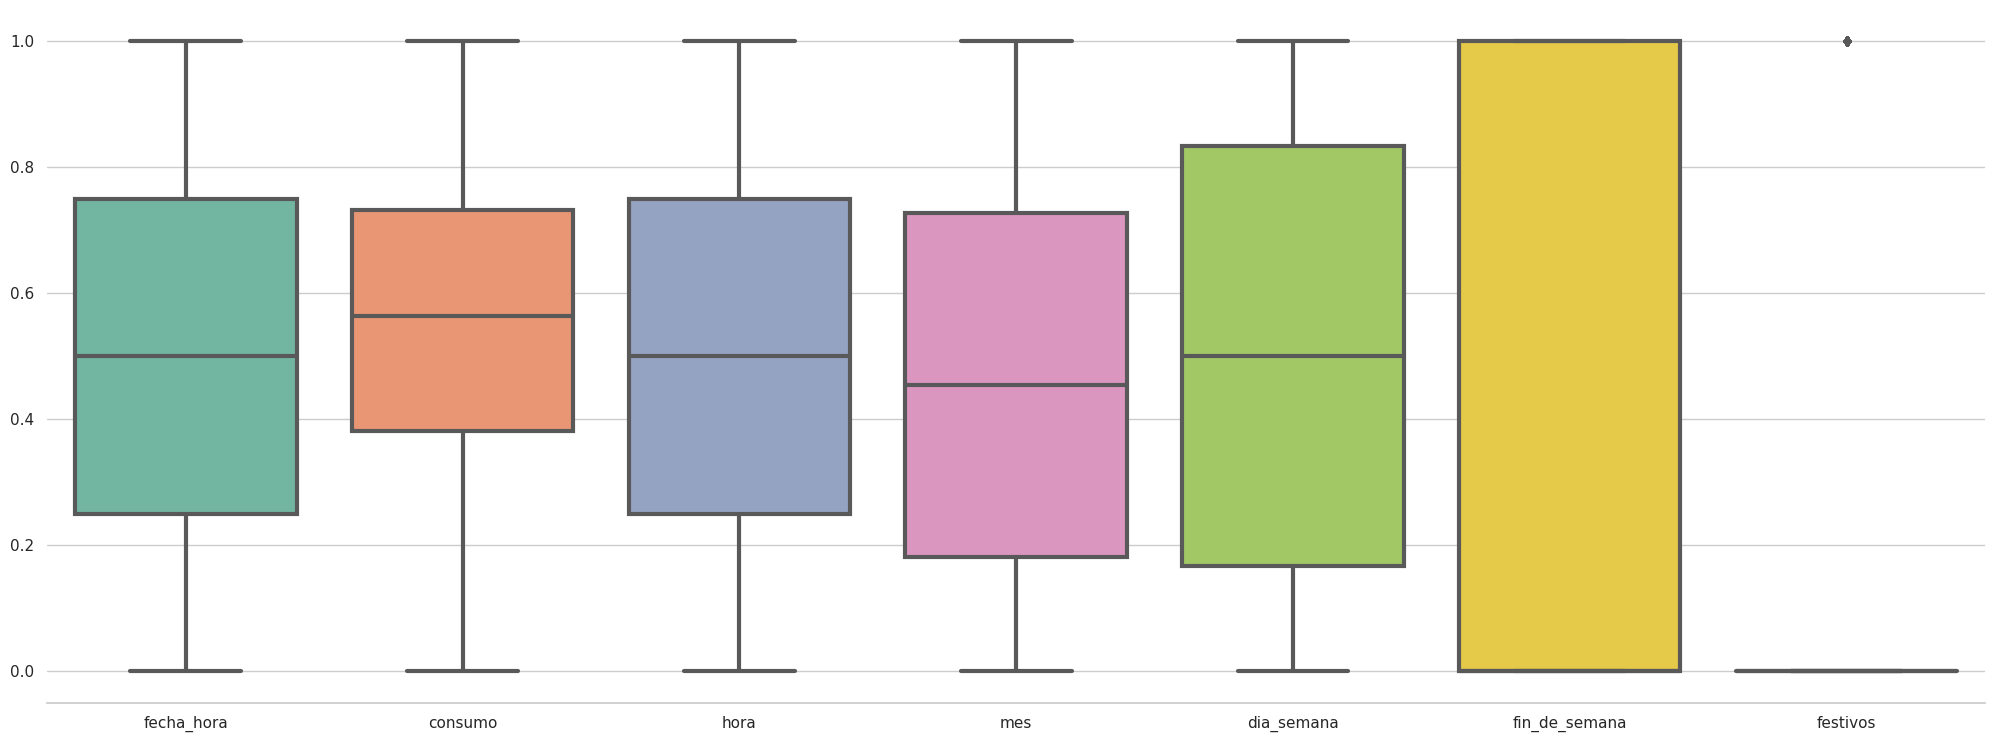

In [41]:
df_consumo_normalizada = (df_consumo - df_consumo.min())/(df_consumo.max() - df_consumo.min())

sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.boxplot(data = df_consumo_normalizada, linewidth = 3,
            palette="Set2", fliersize = 5)
sns.despine(left=True)

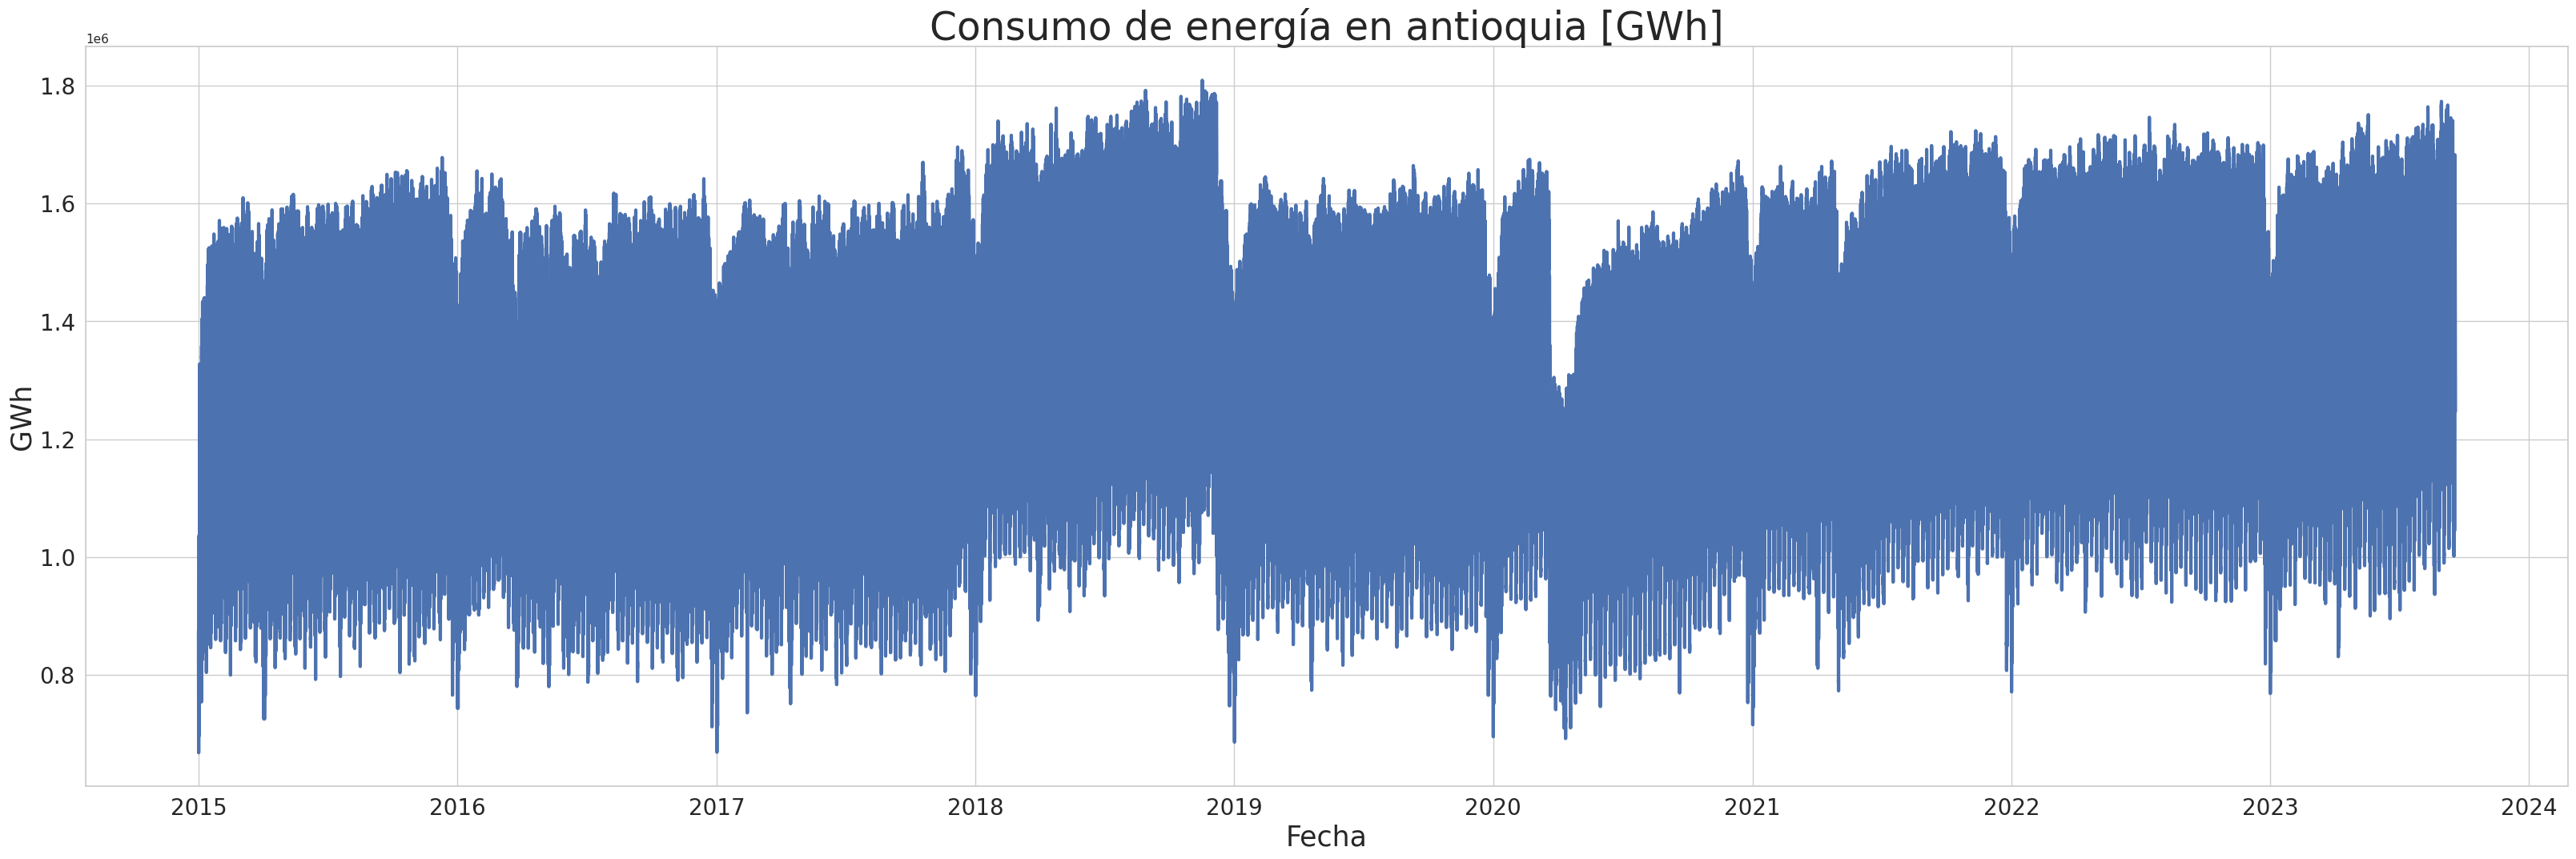

In [42]:
plt.figure(figsize=(40,12))
plt.plot(df_consumo['fecha_hora'], df_consumo['consumo'], linewidth=3)
plt.title('Consumo de energía en antioquia [GWh]', fontsize = 35)
plt.xlabel('Fecha', fontsize = 25)
plt.xticks(fontsize = 20)
plt.ylabel('GWh', fontsize = 25)
plt.yticks(fontsize = 20)
plt.show()

## Combinación

In [43]:
df_consumo_aux = df_consumo.copy(deep=True)
df_temperatura_aux = df_temperatura.copy(deep=True)

In [44]:
df_consumo_aux

,fecha_hora,consumo,hora,mes,dia_semana,fin_de_semana,festivos
0,2015-01-01 00:00:00,874902.37,0,1,4,0,1
1,2015-01-01 01:00:00,811130.06,1,1,4,0,1
2,2015-01-01 02:00:00,768748.60,2,1,4,0,1
3,2015-01-01 03:00:00,744469.99,3,1,4,0,1
4,2015-01-01 04:00:00,735272.46,4,1,4,0,1
...,...,...,...,...,...,...,...
76387,2023-09-18 19:00:00,1651808.39,19,9,1,0,0
76388,2023-09-18 20:00:00,1590831.02,20,9,1,0,0
76389,2023-09-18 21:00:00,1465352.44,21,9,1,0,0
76390,2023-09-18 22:00:00,1338550.97,22,9,1,0,0


In [45]:
df_temperatura_aux

,fecha_hora,temperatura_mediana,temperatura_prom,temperatura_max
0,2015-01-01 00:00:00,20.800,19.250000,21.3
1,2015-01-01 01:00:00,20.700,18.900000,20.8
2,2015-01-01 02:00:00,20.400,18.683333,20.5
3,2015-01-01 03:00:00,20.200,18.566667,20.4
4,2015-01-01 04:00:00,19.700,18.216667,19.9
...,...,...,...,...
74186,2023-10-10 19:00:00,20.150,20.148333,23.2
74187,2023-10-10 20:00:00,19.350,19.431667,22.9
74188,2023-10-10 21:00:00,19.150,19.160476,21.8
74189,2023-10-10 22:00:00,19.125,19.103889,21.7


In [46]:
df_consumo_aux['fecha_hora_str'] = df_consumo_aux['fecha_hora'].dt.strftime('%Y-%m-%d %H:00:00')
df_temperatura_aux['fecha_hora_str'] = df_temperatura_aux['fecha_hora'].dt.strftime('%Y-%m-%d %H:00:00')

df_consumo_aux = df_consumo_aux.merge(df_temperatura_aux[['fecha_hora_str', 'temperatura_mediana', 'temperatura_prom', 'temperatura_max']], how='left', on='fecha_hora_str').reset_index(drop=True)

df_consumo_aux = df_consumo_aux.drop(['fecha_hora_str'], axis = 1)

df_consumo_aux

,fecha_hora,consumo,hora,mes,dia_semana,fin_de_semana,festivos,temperatura_mediana,temperatura_prom,temperatura_max
0,2015-01-01 00:00:00,874902.37,0,1,4,0,1,20.800,19.250000,21.3
1,2015-01-01 01:00:00,811130.06,1,1,4,0,1,20.700,18.900000,20.8
2,2015-01-01 02:00:00,768748.60,2,1,4,0,1,20.400,18.683333,20.5
3,2015-01-01 03:00:00,744469.99,3,1,4,0,1,20.200,18.566667,20.4
4,2015-01-01 04:00:00,735272.46,4,1,4,0,1,19.700,18.216667,19.9
...,...,...,...,...,...,...,...,...,...,...
76387,2023-09-18 19:00:00,1651808.39,19,9,1,0,0,21.375,21.440000,25.7
76388,2023-09-18 20:00:00,1590831.02,20,9,1,0,0,20.500,20.151667,24.3
76389,2023-09-18 21:00:00,1465352.44,21,9,1,0,0,19.650,19.558750,23.3
76390,2023-09-18 22:00:00,1338550.97,22,9,1,0,0,18.850,18.938333,22.7


In [47]:
# clasificación tipos se dias
df_consumo_aux['tipo_dia'] = np.where(np.logical_and(df_consumo_aux['dia_semana']>=1, df_consumo_aux['dia_semana']<=5), 1, 0) # Lunes a viernes
df_consumo_aux['tipo_dia'] = np.where(df_consumo_aux['dia_semana']==6, 2, df_consumo_aux['tipo_dia']) # Sabados
df_consumo_aux['tipo_dia'] = np.where(df_consumo_aux['dia_semana']==7, 3, df_consumo_aux['tipo_dia']) # Domingo

# clasificacion tipos de semanas
df_consumo_dia = df_consumo_aux.copy(deep=True)[['fecha_hora', 'festivos']]
df_consumo_dia['fecha_semana'] = df_consumo_dia['fecha_hora'].dt.strftime('%Y-%m-%d')
df_consumo_dia = df_consumo_dia.drop_duplicates(subset = ['fecha_semana'])
df_consumo_dia['fecha_semana'] = df_consumo_aux['fecha_hora'].dt.strftime('%Y-%W')
df_consumo_dia = df_consumo_dia.groupby(['fecha_semana']).agg({'festivos': 'sum'}).reset_index()

df_consumo_dia['tipo_semana'] = np.where(df_consumo_dia['festivos'] == 0, 1, 0) # semana sin festivos
df_consumo_dia['tipo_semana'] = np.where(df_consumo_dia['festivos'] == 1, 2, df_consumo_dia['tipo_semana']) # semanas con festivos
df_consumo_dia['tipo_semana'] = np.where(df_consumo_dia['festivos'] > 1, 3, df_consumo_dia['tipo_semana']) # semana santa

df_consumo_aux['fecha_semana'] = df_consumo_aux['fecha_hora'].dt.strftime('%Y-%W')
df_consumo_aux = df_consumo_aux.merge(df_consumo_dia[['fecha_semana', 'tipo_semana']], how = 'left', left_on = 'fecha_semana', right_on = 'fecha_semana')

df_consumo_aux = df_consumo_aux.drop(['fecha_semana'], axis=1)

df_consumo_aux

,fecha_hora,consumo,hora,mes,dia_semana,fin_de_semana,festivos,temperatura_mediana,temperatura_prom,temperatura_max,tipo_dia,tipo_semana
0,2015-01-01 00:00:00,874902.37,0,1,4,0,1,20.800,19.250000,21.3,1,2
1,2015-01-01 01:00:00,811130.06,1,1,4,0,1,20.700,18.900000,20.8,1,2
2,2015-01-01 02:00:00,768748.60,2,1,4,0,1,20.400,18.683333,20.5,1,2
3,2015-01-01 03:00:00,744469.99,3,1,4,0,1,20.200,18.566667,20.4,1,2
4,2015-01-01 04:00:00,735272.46,4,1,4,0,1,19.700,18.216667,19.9,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
76387,2023-09-18 19:00:00,1651808.39,19,9,1,0,0,21.375,21.440000,25.7,1,1
76388,2023-09-18 20:00:00,1590831.02,20,9,1,0,0,20.500,20.151667,24.3,1,1
76389,2023-09-18 21:00:00,1465352.44,21,9,1,0,0,19.650,19.558750,23.3,1,1
76390,2023-09-18 22:00:00,1338550.97,22,9,1,0,0,18.850,18.938333,22.7,1,1


### Exploración

In [48]:
df_consumo_aux.dtypes

fecha_hora             datetime64[ns]
consumo                       float64
hora                            int64
mes                             int64
dia_semana                      int64
fin_de_semana                   int64
festivos                        int64
temperatura_mediana           float64
temperatura_prom              float64
temperatura_max               float64
tipo_dia                        int64
tipo_semana                     int64
dtype: object

In [49]:
# Número de registros y caracteristicas
df_consumo_aux.shape

(76392, 12)

In [50]:
# Información general del DataFrame
df_consumo_aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76392 entries, 0 to 76391
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fecha_hora           76392 non-null  datetime64[ns]
 1   consumo              76392 non-null  float64       
 2   hora                 76392 non-null  int64         
 3   mes                  76392 non-null  int64         
 4   dia_semana           76392 non-null  int64         
 5   fin_de_semana        76392 non-null  int64         
 6   festivos             76392 non-null  int64         
 7   temperatura_mediana  73663 non-null  float64       
 8   temperatura_prom     73663 non-null  float64       
 9   temperatura_max      73663 non-null  float64       
 10  tipo_dia             76392 non-null  int64         
 11  tipo_semana          76392 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 7.6 MB


In [51]:
# Se verifica si existen registros duplicados en todo el dataset
df_consumo_aux.duplicated().sum()

0

In [52]:
# Se muestran las estadisticas basicas del dataset
df_consumo_aux.describe()

,consumo,hora,mes,dia_semana,fin_de_semana,festivos,temperatura_mediana,temperatura_prom,temperatura_max,tipo_dia,tipo_semana
count,7.639200e+04,76392.000000,76392.000000,76392.000000,76392.000000,76392.000000,73663.000000,73663.000000,73663.000000,76392.000000,76392.000000
mean,1.299275e+06,11.500000,6.384543,4.000943,0.285894,0.049010,19.670653,19.509814,22.114617,1.428841,1.331134
std,2.327948e+05,6.922232,3.411822,2.000248,0.451842,0.215891,3.633836,3.488717,3.617113,0.728586,0.510953
min,6.674777e+05,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.103272e+06,5.750000,3.000000,2.000000,0.000000,0.000000,16.875000,16.800000,19.400000,1.000000,1.000000
50%,1.311256e+06,11.500000,6.000000,4.000000,0.000000,0.000000,19.000000,18.700000,21.300000,1.000000,1.000000
75%,1.503453e+06,17.250000,9.000000,6.000000,1.000000,0.000000,22.300000,22.083333,24.600000,2.000000,2.000000
max,1.809559e+06,23.000000,12.000000,7.000000,1.000000,1.000000,32.600000,32.600000,48.900000,3.000000,3.000000


### Atipicos

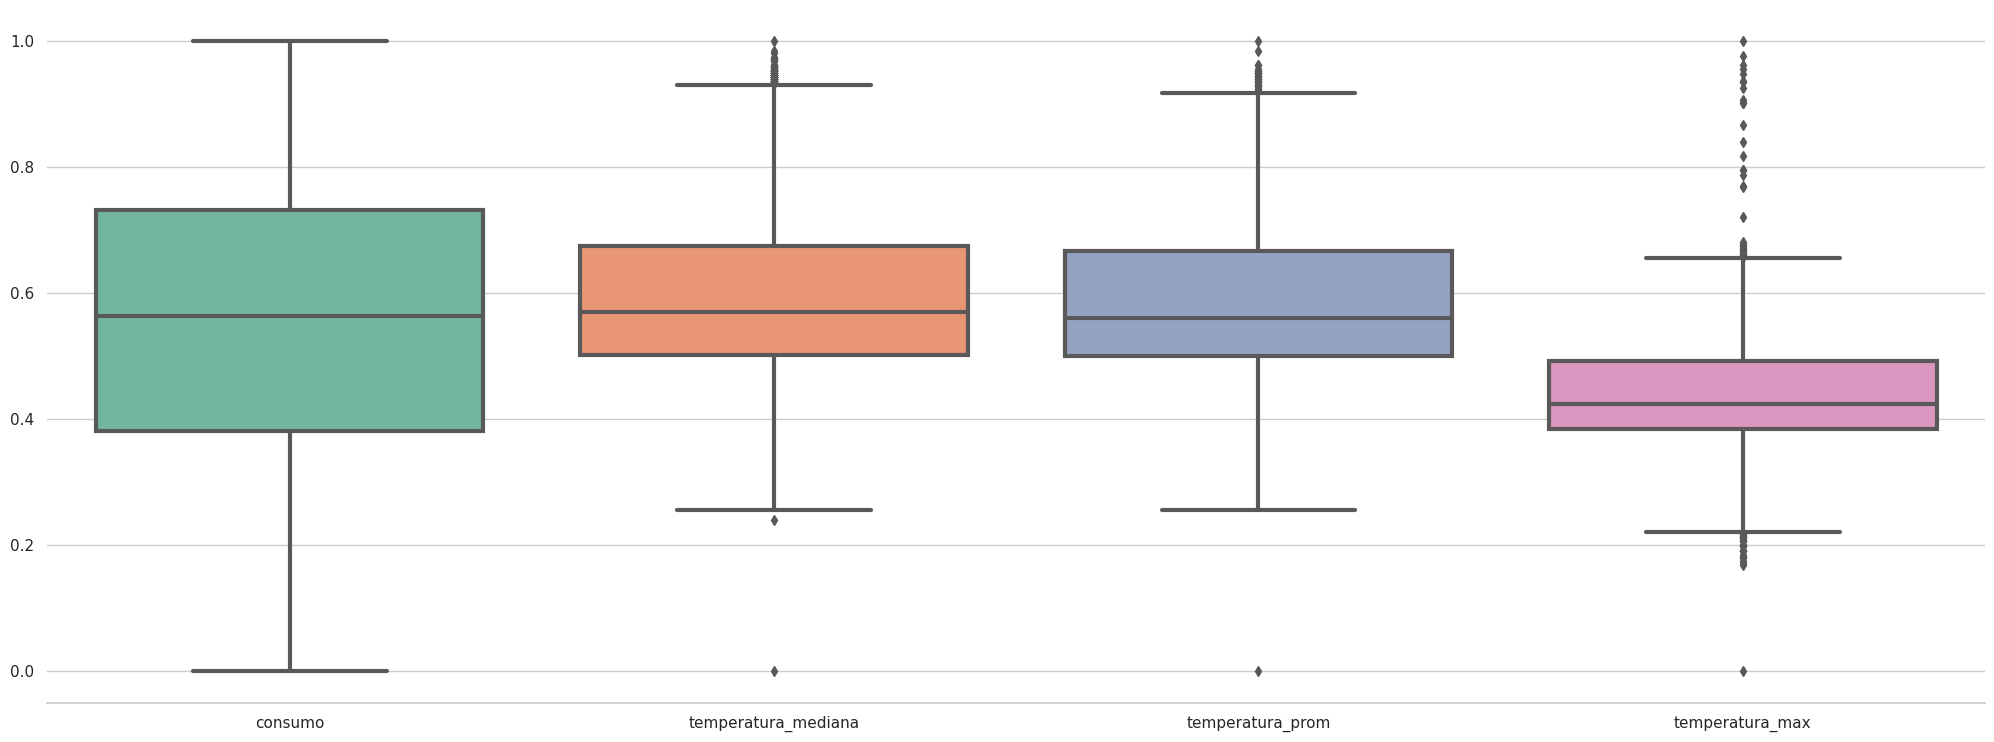

In [53]:
df_consumo_aux_normalizada = df_consumo_aux[['consumo', 'temperatura_mediana', 'temperatura_prom', 'temperatura_max']]

df_consumo_aux_normalizada = (df_consumo_aux_normalizada - df_consumo_aux_normalizada.min())/(df_consumo_aux_normalizada.max() - df_consumo_aux_normalizada.min())

sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.boxplot(data = df_consumo_aux_normalizada, linewidth = 3,
            palette="Set2", fliersize = 5)
sns.despine(left=True)

### Datos nulos

In [54]:
# Se crea un dataframe donde se muestra el porcentaje de datos nulos ordenados de mayor a menor por las variables que mas tienen
df_null = pd.DataFrame()
df_null['caracteristica'] = dict(df_consumo_aux.isnull().sum()).keys()
df_null['% datos nulos'] = dict(df_consumo_aux.isnull().sum()).values()
df_null['% datos nulos'] = 100*(df_null['% datos nulos']/int(df_consumo_aux.shape[0]))

df_null = df_null.sort_values(by = '% datos nulos', ascending = False).reset_index(drop = True)

df_null.head(5)

,caracteristica,% datos nulos
0,temperatura_mediana,3.572364
1,temperatura_prom,3.572364
2,temperatura_max,3.572364
3,fecha_hora,0.000000
4,consumo,0.000000


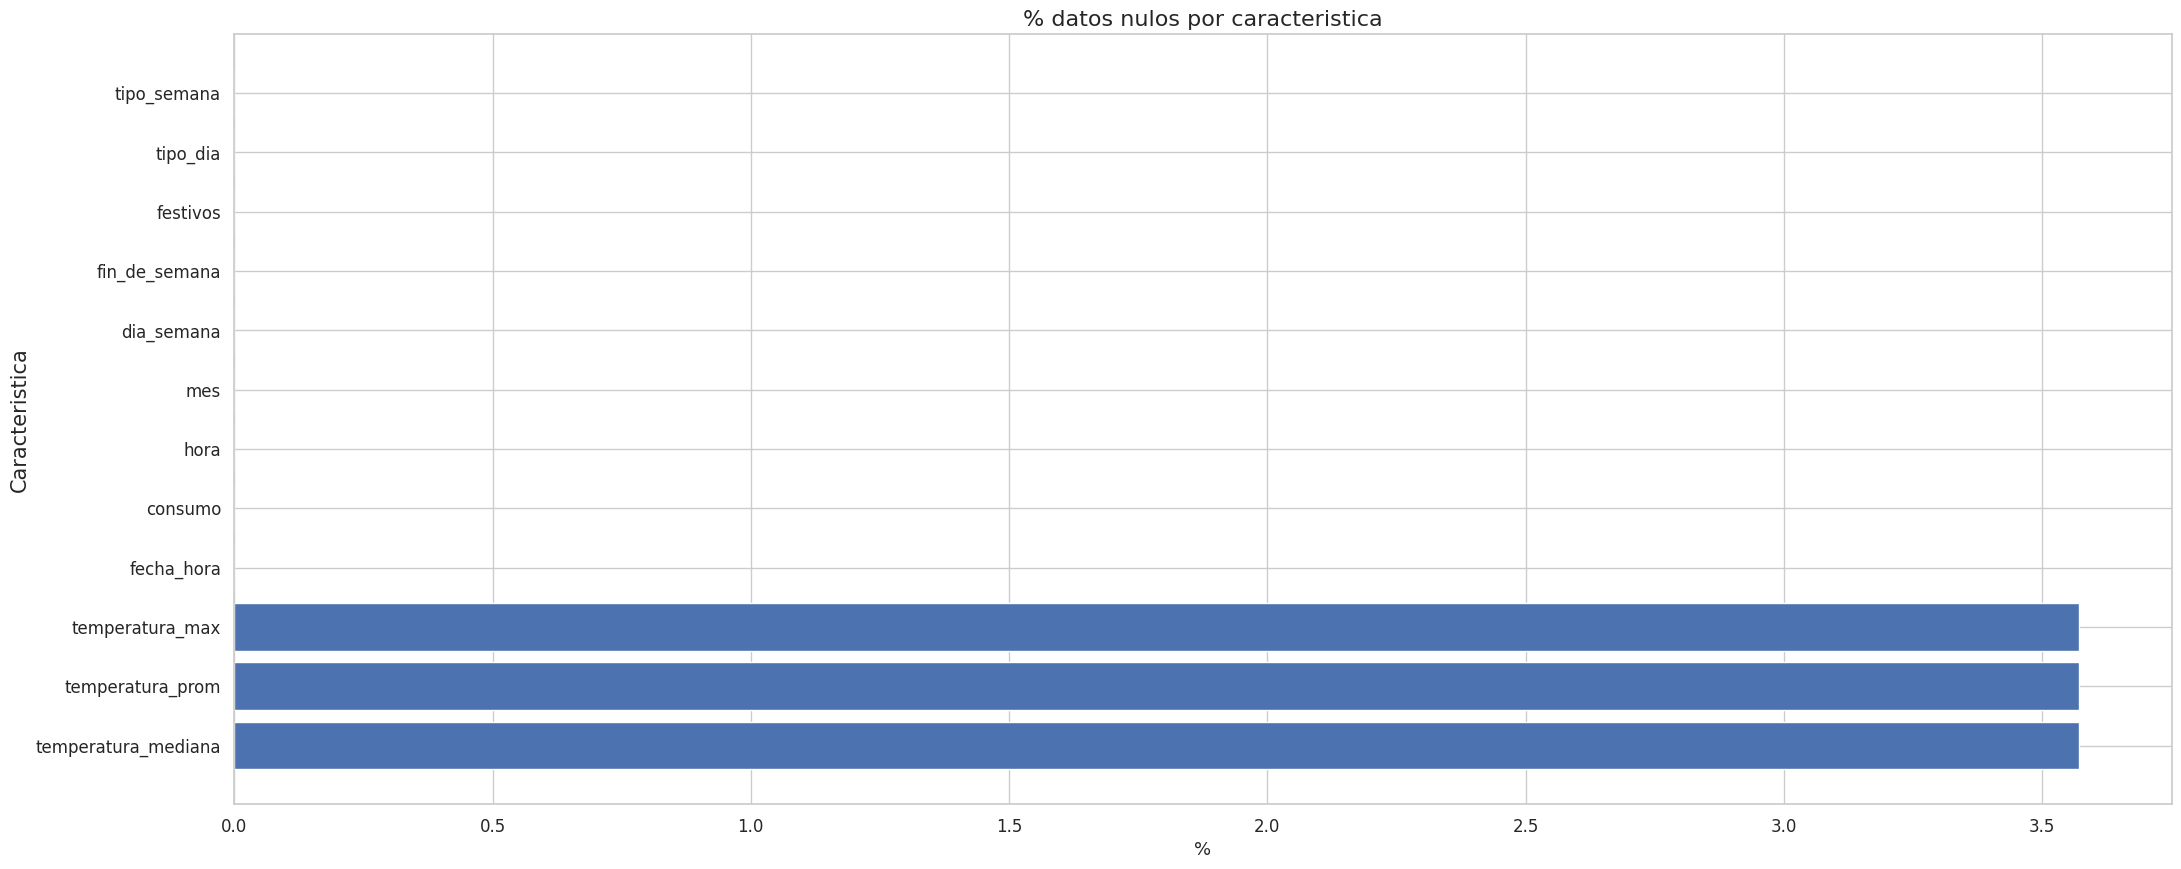

In [55]:
plt.figure(figsize=(25, 10))
plt.barh(df_null['caracteristica'], df_null['% datos nulos'])
plt.title('% datos nulos por caracteristica', fontsize = 16)
plt.xlabel('%', fontsize = 13)
plt.xticks(fontsize = 12)
plt.ylabel('Caracteristica', fontsize = 15)
plt.yticks(fontsize = 12)
plt.show()

### Imputación

In [56]:
# Para realizar la imputación es obligatorio no tener caracteriticas o variables de tiempo, por eso se va a cambiar el tipo de dato de forma temporal
imp = KNNImputer(missing_values = np.nan, n_neighbors = 5, weights= "uniform")

# Imputación por el algoritmo KNN con 5 vecinos y promedio uniforme.
imp.fit(df_consumo_aux[['temperatura_mediana', 'temperatura_prom', 'temperatura_max']])
df_consumo_aux_temp = imp.transform(df_consumo_aux[['temperatura_mediana', 'temperatura_prom', 'temperatura_max']])

df_consumo_aux_temp = pd.DataFrame(df_consumo_aux_temp, columns = df_consumo_aux[['temperatura_mediana', 'temperatura_prom', 'temperatura_max']].columns)

In [57]:
df_consumo_aux_temp

,temperatura_mediana,temperatura_prom,temperatura_max
0,20.800,19.250000,21.3
1,20.700,18.900000,20.8
2,20.400,18.683333,20.5
3,20.200,18.566667,20.4
4,19.700,18.216667,19.9
...,...,...,...
76387,21.375,21.440000,25.7
76388,20.500,20.151667,24.3
76389,19.650,19.558750,23.3
76390,18.850,18.938333,22.7


In [58]:
df_consumo_aux = pd.concat([df_consumo_aux.drop(['temperatura_mediana', 'temperatura_prom', 'temperatura_max'], axis = 1), df_consumo_aux_temp], axis=1)

df_consumo_aux.sort_values(by = 'fecha_hora', ascending = True).reset_index(drop = True)

,fecha_hora,consumo,hora,mes,dia_semana,fin_de_semana,festivos,tipo_dia,tipo_semana,temperatura_mediana,temperatura_prom,temperatura_max
0,2015-01-01 00:00:00,874902.37,0,1,4,0,1,1,2,20.800,19.250000,21.3
1,2015-01-01 01:00:00,811130.06,1,1,4,0,1,1,2,20.700,18.900000,20.8
2,2015-01-01 02:00:00,768748.60,2,1,4,0,1,1,2,20.400,18.683333,20.5
3,2015-01-01 03:00:00,744469.99,3,1,4,0,1,1,2,20.200,18.566667,20.4
4,2015-01-01 04:00:00,735272.46,4,1,4,0,1,1,2,19.700,18.216667,19.9
...,...,...,...,...,...,...,...,...,...,...,...,...
76387,2023-09-18 19:00:00,1651808.39,19,9,1,0,0,1,1,21.375,21.440000,25.7
76388,2023-09-18 20:00:00,1590831.02,20,9,1,0,0,1,1,20.500,20.151667,24.3
76389,2023-09-18 21:00:00,1465352.44,21,9,1,0,0,1,1,19.650,19.558750,23.3
76390,2023-09-18 22:00:00,1338550.97,22,9,1,0,0,1,1,18.850,18.938333,22.7


In [59]:
df_consumo_aux.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76392 entries, 0 to 76391
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   fecha_hora           76392 non-null  datetime64[ns]
 1   consumo              76392 non-null  float64       
 2   hora                 76392 non-null  int64         
 3   mes                  76392 non-null  int64         
 4   dia_semana           76392 non-null  int64         
 5   fin_de_semana        76392 non-null  int64         
 6   festivos             76392 non-null  int64         
 7   tipo_dia             76392 non-null  int64         
 8   tipo_semana          76392 non-null  int64         
 9   temperatura_mediana  76392 non-null  float64       
 10  temperatura_prom     76392 non-null  float64       
 11  temperatura_max      76392 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 7.6 MB


### Exportar archivo

In [60]:
df_consumo_aux.to_csv('/content/drive/MyDrive/Colab Notebooks/especializacion/Monografia/data/data_procesada.csv', index = False) # guardar en h5py